In this notebook, we will implement backpropagation from scratch, but before that we need to know about the Computational Graph.

## Prerequisites:
To start with computational graph and Back propagation, you must have knowledge about:
* Mathematical derivatives used in calculus.
* Error metrics
* Loss functions.

## Computational Graphs:
A computational graph is a representation of mathematical functions using graph theory, consisting of nodes and edges.

Components:
  * Nodes: Represent operations or variables.
  * Edges: Represent the flow of data and carry weights.

The purpose of Computational Graphs is to visually and structurally represent the flow of data and operations in mathematical computations. They are crucial for understanding and implementing forward and backward propagation of values (data) in neural networks.

**Illustration**:

Lets consider a simple equation, that is represented in the form of  computational graph as below:

<p align="center">s = 2x</p>
<p align="center">y = s + a</p>

<center>
<img src="https://doc.google.com/a/fusemachines.com/uc?id=1_WwWjWXvT6b31TS402a9tVe7EjZw_Exu">

Figure 1: Computational graph
</center>



## Forward Propagation of Values in the Graph:

<p align="justify">Following figure depicts the forward propagation of inputs to predict values using computational graph.</p>

<center>
<img src="https://doc.google.com/a/fusemachines.com/uc?export=download&id=1_O3ToEv86f9eYhlK8zpFXpJ6_z53x5io">

Figure 2: A Neural Network as a Computational Graph to show Forward Propagation
</center>

## Backward Propagation of Error:
To adapt the weights or parameters in the neural network, the error value is propagated this time but from right to the left in the above graph.

**Illustration**:

Consider a logistic regression with two inputs variables $x_1$ and $x_2$. In graph below, $z$ is weighted sum of input plus bias, $\hat{y}$ is the output of a sigmoid function and $y$ is the label for a training example which are finally feed to Binary cross entropy loss.

<center>
    <img src="https://doc.google.com/a/fusemachines.com/uc?export=download&id=14MXS74SqI0ouBzvtwgyLTA8v93g66mRG" alt="ford_prop" height="400" width = "900">

Figure 3: Computational Graph for Logistic regression
</center>

We have,

$$z = 1 * w_0 + x_1 * w_1 + x_2 * w_2$$

$$\hat{y} = \frac{1}{1 + e^{-(1 * w_0 + x_1 * w_1 + x_2 * w_2)}}$$

$$Loss (L) = - ( y \log{\hat{y}} + (1 - y) \log{(1-\hat{y})})$$




### Chain Rule:

Before getting into backward propagation in Logistic Regression, lets understand Chain Rule.


Simply put, the chain rule in Calculus can be written as:

$$\frac{\partial{z}}{\partial{x}} = \frac{\partial{z}}{\partial{y}}.\frac{\partial{y}}{\partial{x}}$$

Suppose, we have $x$ and $y$ as input which is feed to $z$, where $z=f(x,y)$ and $z$ is finally feed to $L$,where $L=g(z)$.

Then , the local gradient for a particular node  can be defined as partial derivative of `immediate output` of that node with respect to it's `immediate inputs.`

<center>
<img src="https://doc.google.com/a/fusemachines.com/uc?export=download&id=1XpuptKuwAoNrK6FF0hfpBHzjxWIN2ICC" alt="local_gradient" height="300" >

Figure 4: Local gradient of two nodes
</center>

In the figure 4, the local gradients for first node are:

* $\frac{\partial{Z}}{\partial{x}}$

* $\frac{\partial{Z}}{\partial{y}}$

Similarly for the second node the local gradient is:

* $\frac{\partial{L}}{\partial{Z}}$


## Backward Propagation Continued.. (Using Chain Rule):

<center>
    <img src="https://doc.google.com/a/fusemachines.com/uc?export=download&id=1RFe8TVQyTZcg41W1Gc64rbE3u_VX2GfU" alt="chain_rule" height="350">

Figure 5: Chain Rule for Logistic Regression.
</center>

For the Backpropagation, we apply chain rule. So lets refer to the diagram, understand what is to be calculated and what is known. We will list them point-wise as:

1. **Known Gradients** = Local Gradients = $\frac{\partial{L}}{\partial{ŷ}}$, $\frac{\partial{ŷ}}{\partial{Z}}$, ( $\frac{\partial{Z}}{\partial{w0}}$, $\frac{\partial{Z}}{\partial{w1}}$, $\frac{\partial{Z}}{\partial{w2}}$ )

2. **To Find** = Final Loss with respect to local inputs (weights) = $\frac{\partial{L}}{\partial{ŷ}}$, $\frac{\partial{L}}{\partial{Z}}$, ( $\frac{\partial{L}}{\partial{w0}}$, $\frac{\partial{L}}{\partial{w1}}$, $\frac{\partial{L}}{\partial{w2}}$ )

3. **Chain Rule** = Use point (1) to calculate point (2) as shown in Figure (5).



### Calculation:

Lets calculate all the gradients.

1. Local gradients :

$\frac{\partial{L}}{\partial{\hat{y}}}=\frac{\partial{-(y\log{\hat{y}}+(1-y)\log{(1-\hat{y})})}}{\partial{\hat{y}}}$

$\therefore \frac{\partial{L}}{\partial{\hat{y}}}=-(\frac{y}{\hat{y}}-\frac{(1-y)}{(1-\hat{y})})$

\

$\frac{\partial{\hat{y}}}{\partial{z}}=\frac{\partial({\frac{1}{1+e^{-z}}})}{\partial{z}}$        (Since, $\hat{y}=\frac{1}{1+e^{-z}}$)

$\frac{\partial{\hat{y}}}{\partial{z}}=\frac{(1+e^{-z})*\frac{\partial{(1)}}{\partial{z}}-\frac{\partial{(1+e^{-z})}}{\partial{z}}*1}{(1+e^{-z})^2}$

$\frac{\partial{\hat{y}}}{\partial{z}}=\frac{0-(-e^{-z})}{(1+e^{-z})^2}$

$\frac{\partial{\hat{y}}}{\partial{z}}=\frac{e^{-z}}{(1+e^{-z})^2}$

$\frac{\partial{\hat{y}}}{\partial{z}}=\frac{1}{(1+e^{-z})}*\frac{e^{-z}}{(1+e^{-z})}$

$\frac{\partial{\hat{y}}}{\partial{z}}=\hat{y}*(1-\frac{1}{(1+e^{-z})})$

$\therefore \frac{\partial{\hat{y}}}{\partial{z}}=\hat{y}*(1-\hat{y})$

\

\

$\frac{\partial{z}}{\partial{w_0}}=\frac{\partial{(w_0+x_1*w_1+x_2*w_2)}}{\partial{w_0}}$

$\therefore \frac{\partial{z}}{\partial{w_0}}=1$

$\therefore \frac{\partial{z}}{\partial{w_1}}=x_1$

$\therefore \frac{\partial{z}}{\partial{w_2}}=x_2$

* **Note**: The gradient of `z` with respect to `w` = `Input` as seen just now. This is so because z is the weighted sum.

\

2. Chain Rule to find the gradient of Final loss with respect to weights:

$\therefore\frac{\partial{L}}{\partial{\hat{y}}}=-(\frac{y}{\hat{y}}-\frac{(1-y)}{(1-\hat{y})})$

$\therefore\frac{\partial{L}}{\partial{z}}=\frac{\partial{L}}{\partial{\hat{y}}}*\frac{\partial{\hat{y}}}{\partial{z}}=-(\frac{y}{\hat{y}}-\frac{(1-y)}{(1-\hat{y})})*\hat{y}*(1-\hat{y})$


$\therefore\frac{\partial{L}}{\partial{w_0}}=\frac{\partial{L}}{\partial{\hat{y}}}*\frac{\partial{\hat{y}}}{\partial{z}}*\frac{\partial{z}}{\partial{w_0}}=-(\frac{y}{\hat{y}}-\frac{(1-y)}{(1-\hat{y})})*\hat{y}(1-\hat{y})*1$

$\therefore\frac{\partial{L}}{\partial{w_1}}=\frac{\partial{L}}{\partial{\hat{y}}}*\frac{\partial{\hat{y}}}{\partial{z}}*\frac{\partial{z}}{\partial{w_1}}=-(\frac{y}{\hat{y}}-\frac{(1-y)}{(1-\hat{y})})*\hat{y}(1-\hat{y})*x_1$

$\therefore \frac{\partial{L}}{\partial{w_2}}=\frac{\partial{L}}{\partial{\hat{y}}}*\frac{\partial{\hat{y}}}{\partial{z}}*\frac{\partial{z}}{\partial{w_2}}=-(\frac{y}{\hat{y}}-\frac{(1-y)}{(1-\hat{y})})*\hat{y}(1-\hat{y})*x_2$



### Weight Update:
The main objective of the backpropagation is to update the weights so that the model may "learn" something.

Now, we update the weights as follows:

$new \space w = old \space w + \Delta w = old \space w + \eta (- \frac{\partial L}{\partial w})$

where, $\eta$ is the learning rate.

For example,

$$new \space w_0 = old \space w_0 + \Delta w_0 = old \space w_0 + \eta (- \frac{\partial L}{\partial w_0})$$
$$new \space w_1 = old \space w_1 + \Delta w_1 = old \space w_1 + \eta (- \frac{\partial L}{\partial w_1})$$

$$new \space w_2 = old \space w_2 + \Delta w_2 = old \space w_2 + \eta (- \frac{\partial L}{\partial w_2})$$

## Implementation from Scratch:
Let's move on to the juice of the notebook, where we implement the backpropagation algorithm from Scratch.

In [ ]:
!pip install numpy
!pip install matplotlib
!pip install sklearn

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

**Dataset Preparation**: Here we assign the features and target as X and y respectively.

In [16]:
X, y = sklearn.datasets.make_blobs(n_samples=200, centers=2, n_features=2, center_box=(1, 10),random_state=40)

In [17]:
print(X.shape)
print(y.shape)

(200, 2)
(200,)


**Dataset Visualization**:
There are 2 features in the dataset, lets visualize the data.


Text(0.5, 1.0, 'Scatter plot of the dataset')

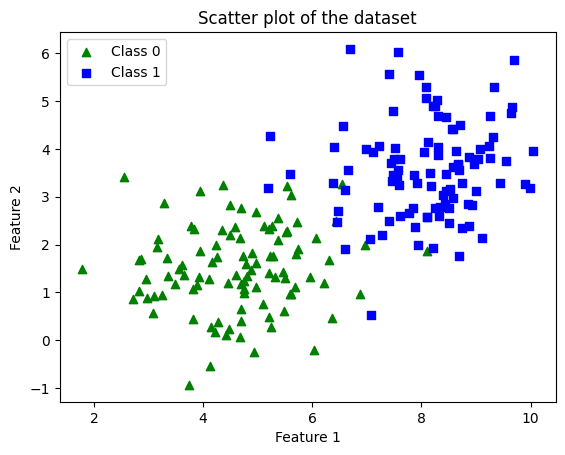

In [18]:
# Plot the data
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='green', marker='^', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='s', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Scatter plot of the dataset')

**Network Architecture**:

Let us consider a logistic regression with two inputs variable $x_1$ and $x_2$. In the computational graph below $z$ is a weighted sum of input plus bias. $\hat{y}$ is the output of the sigmoid function and $y$ is the true label for training example. $y$ and $\hat{y}$ are then passed to a binary cross entropy loss function to calculate the loss.

<center>
<img src="https://doc.google.com/a/fusemachines.com/uc?export=download&id=14MXS74SqI0ouBzvtwgyLTA8v93g66mRG" alt="ford_prop" height="300" width="600">

Figure 6: Architecture for Logistic Regression
</center>

Thus,

$$z = 1 * w_0 + x_1 * w_1 + x_2 * w_2$$

$$\hat{y} = \frac{1}{1 + e^{-(1 * w_0 + x_1 * w_1 + x_2 * w_2)}}$$

$$L = loss = - ( y \log{\hat{y}} + (1 - y) \log{(1-\hat{y})})$$

\



The bias term can be included in the neuron by 2 ways:

1. Explicit addition of bias after weighted sum.

    * `weighted_sum_with_bias = w.x +b`

2. Augmenting the dataset so that we add 1 more column in the beginning. This also requires us to increase the size of the weight matrix.

  For example, the feature 'X' of shape (200,2) must be changed to (200,3) and the weight matrix 'w' of shape (2,1) must be changed (3,1).

  In this case, the bias is already included in the matrix multiplication, and there is no separate addition of bias 'b'.

    * `weighted_sum = w.x`

Let's follow the second method.

In [126]:
ones_=np.ones((X.shape[0],1))             # creates a column vector with the same number of rows as X and 1 column, filled with ones.
x=np.concatenate((ones_,X),axis=1)        # Concatenate 1s with fature vector X. (each sample in X will have an additional feature that is always 1 to account for the bias term.)
y=y.reshape(y.shape[0],1)

w=np.random.rand(3,1)                     # creates a 3x1 matrix of random values between 0 and 1. (initialize weight vector)

In [124]:
print(X.shape)                   # only 2 features before
print(x.shape)                   # one feature added (with all 1) to accont for bias term
print(y.shape)

(200, 2)
(200, 3)
(200, 1)


Lets write functions for different operations rather than using the existing libraries.


In [127]:
# Weighted sum
# In the above figure 6, the node z represents this

def weighted_sum(x,w):
  return np.matmul(x,w)

In [46]:
# Sigmoid operation
# In the above figure 6, y hat node denotes this

def sigmoid(z):
  return 1/(1+np.exp(-z))

In [104]:
# Loss calculation.
# In the figure 6, the Loss node represents this

def loss_(y_hat, y):
  loss=0
  for index,val in enumerate(y_hat):
      predicted = val
      actual=y[index]
      loss-=(actual*np.log(val)+(1-actual)*np.log(1-predicted))
  loss = loss/ y.shape[0]
  return float(loss)

Lets write the training loop, which requires calculation of gradients and updation of weight.

Recall that for the above architecture, we need the following gradients:

1. $\frac{\partial{L}}{\partial{\hat{y}}}$  : This is the most obvious right-most gradient.

2. $\frac{\partial{L}}{\partial{z}}$ : This requires the above gradient and one known local gradient ( $ \frac{\partial{ŷ}}{\partial{z}}$ )

     $\therefore \frac{\partial{L}}{\partial{z}}$ = $\frac{\partial{L}}{\partial{\hat{y}}}$ * $ \frac{\partial{ŷ}}{\partial{z}}$

3. $ \frac{\partial{L}}{\partial{w}}$ : This requires the above gradient and local gradient ( $\frac{\partial{z}}{\partial{{w}}}$ = x )  

  [**Recall that the gradient of weighted sum with respect to weight is the input**]

     $\therefore \frac{\partial{L}}{\partial{w}}$ = $\frac{\partial{L}}{\partial{z}}$ * x



In [115]:
# Training loop with Backpropagation

def train(x,y,epochs, w, learning_rate):
  for i in range(epochs):

    z = weighted_sum(x,w)
    y_hat = sigmoid(z)

    dl_dyhat = -(y/y_hat-(1-y)/(1-y_hat))    # 1st gradient
    dyhat_dz = y_hat * (1-y_hat)            # local gradient required for 2nd gradient

    dl_dz = dl_dyhat * dyhat_dz             # 2nd gradient

    dl_dw= np.matmul(x.T,dl_dz)             # 3rd gradient

    w=w-learning_rate*dl_dw                 # weight update

    if i % 100 == 0:  # Print loss every 100 epochs
        print("Loss at epoch {} is: {:.3f}".format(i, loss(y_hat, y)))

  return w


In [19]:
learning_rate = 0.001  # hyperparameter

In [116]:
model = train(x, y, 1000, w, learning_rate)

Loss at epoch 0 is: 2.493
Loss at epoch 100 is: 0.401
Loss at epoch 200 is: 0.312
Loss at epoch 300 is: 0.261
Loss at epoch 400 is: 0.229
Loss at epoch 500 is: 0.206
Loss at epoch 600 is: 0.190
Loss at epoch 700 is: 0.178
Loss at epoch 800 is: 0.168
Loss at epoch 900 is: 0.160
